<h2>Purpose</h2>

ode purpose of this project is to attempt to use linear methods to predict changes in the exchange rate of currency (relative to the US dollar). Data on currency exchange rates will be taken from the ___ while data on the exchange rates will be taken from the International labor organization. Australia will be the first country explored due to it's good labor data.

In [1]:
#Import the libraries.

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import sklearn as sk
import time
from scipy import stats

In [2]:
#Import the data on labor. The period is monthly.
df_l_a = pd.read_csv('/home/harry/Labor_currency_project/AUS_M.csv')
df_l_a

/home/harry/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,NaN,1978M02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,NaN,1978M02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,NaN,1978M02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,NaN,1978M02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,NaN,1978M02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2019M12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2020M03,2.1900,NaN,I12:422,R1:3139


In [3]:
#Replace NAN values. Change the Dates to a pandas readable format.
df_l_a['classif1'] = df_l_a['classif1'].replace(np.nan, 0)
df_l_a['classif2'] = df_l_a['classif2'].replace(np.nan, 0)
df_l_a['time'] = df_l_a['time'].str.replace('M','-')
df_l_a['time'] = pd.to_datetime(df_l_a['time'])
df_l_a['time'] = df_l_a['time'].dt.to_period('M')
df_l_a

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,0,1978-02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,0,1978-02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,0,1978-02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,0,1978-02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,0,1978-02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,0,2019-09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,0,2019-12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,0,2019-12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,0,2020-03,2.1900,NaN,I12:422,R1:3139


We also import data from the United States to get normalized values for labor.

In [4]:

df_l_u = pd.read_csv('/home/harry/Labor_currency_project/Preliminary_exploration/USA_M.csv')
df_l_u

/home/harry/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,obs_status,note_classif,note_indicator,note_source
0,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_TOTAL,NaN,1948M01,102603.0000,NaN,NaN,I12:422,T2:85
1,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y15-24,NaN,1948M01,20104.0000,NaN,C6:1058,I12:422,T2:85
2,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y25-34,NaN,1948M01,22549.0000,NaN,NaN,I12:422,T2:85
3,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y35-44,NaN,1948M01,19969.0000,NaN,NaN,I12:422,T2:85
4,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y45-54,NaN,1948M01,16670.0000,NaN,NaN,I12:422,T2:85
...,...,...,...,...,...,...,...,...,...,...,...,...
1457064,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,NaN,1977M11,0.5786,NaN,C1:965,I12:422,S4:31_S5:2539
1457065,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,NaN,1977M12,0.3776,NaN,NaN,I12:422,S4:31_S5:2539
1457066,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,NaN,1977M12,0.3661,NaN,C1:965,I12:422,S4:31_S5:2539
1457067,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,NaN,1978M01,0.5373,NaN,NaN,I12:422,S4:31_S5:2539


In [5]:
df_l_u['classif1'] = df_l_u['classif1'].replace(np.nan, 0)
df_l_u['classif2'] = df_l_u['classif2'].replace(np.nan, 0)
df_l_u['time'] = df_l_u['time'].str.replace('M','-')
df_l_u['time'] = pd.to_datetime(df_l_u['time'])
df_l_u['time'] = df_l_u['time'].dt.to_period('M')
df_l_u

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,obs_status,note_classif,note_indicator,note_source
0,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_TOTAL,0,1948-01,102603.0000,NaN,NaN,I12:422,T2:85
1,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y15-24,0,1948-01,20104.0000,NaN,C6:1058,I12:422,T2:85
2,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y25-34,0,1948-01,22549.0000,NaN,NaN,I12:422,T2:85
3,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y35-44,0,1948-01,19969.0000,NaN,NaN,I12:422,T2:85
4,USA,POP_XWAP_SEX_AGE_NB,BA:453,SEX_T,AGE_10YRBANDS_Y45-54,0,1948-01,16670.0000,NaN,NaN,I12:422,T2:85
...,...,...,...,...,...,...,...,...,...,...,...,...
1457064,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,0,1977-11,0.5786,NaN,C1:965,I12:422,S4:31_S5:2539
1457065,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,0,1977-12,0.3776,NaN,NaN,I12:422,S4:31_S5:2539
1457066,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_FOO,0,1977-12,0.3661,NaN,C1:965,I12:422,S4:31_S5:2539
1457067,USA,CPI_MCPI_COI_RT,GA:2473,NaN,COI_COMPONENT_GEN,0,1978-01,0.5373,NaN,NaN,I12:422,S4:31_S5:2539


In [6]:
#Import the currency exchange values. Note that they are a daily value.

df_c = pd.read_csv('/home/harry/Labor_currency_project/Preliminary_exploration/datasets_535863_984605_Foreign_Exchange_Rates.csv')

df_c

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [7]:
#Convert the date and rename the column.
pd.to_datetime(df_c['Time Serie'])
df_c.rename(columns = {'Time Serie':'Date'}, inplace = True)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [8]:
#Here we will make the actual numeric values into float values to remove the ND values 
#replacing them with the average.

cols = ['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']
for i in cols:
    df_c[i] = pd.to_numeric(df_c[i], errors = 'coerce')
    #df_c[i].astype(str)

#pd.to_numeric(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], errors = 'coerce')

In [9]:
df_c['Date'] = pd.to_datetime(df_c['Date'])
df_c.dtypes

Unnamed: 0                                            int64
Date                                         datetime64[ns]
AUSTRALIA - AUSTRALIAN DOLLAR/US$                   float64
EURO AREA - EURO/US$                                float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$                 float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$           float64
BRAZIL - REAL/US$                                   float64
CANADA - CANADIAN DOLLAR/US$                        float64
CHINA - YUAN/US$                                    float64
HONG KONG - HONG KONG DOLLAR/US$                    float64
INDIA - INDIAN RUPEE/US$                            float64
KOREA - WON/US$                                     float64
MEXICO - MEXICAN PESO/US$                           float64
SOUTH AFRICA - RAND/US$                             float64
SINGAPORE - SINGAPORE DOLLAR/US$                    float64
DENMARK - DANISH KRONE/US$                          float64
JAPAN - YEN/US$                         

In [10]:
#Interpolate for bank holidays. We used and average as this should not significantly alter a monthly value to be used
#in the late predictions.
df_c = df_c.interpolate(method='linear', limit_direction='forward', axis=0)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.98470,1.9033,0.61460,1.80500,1.4465,8.27980,7.7765,...,1.6563,7.3290,101.700,3.80000,7.96400,8.44300,72.30,1.58080,31.380,36.97
1,1,2000-01-04,1.5239,0.97000,1.9238,0.61090,1.84050,1.4518,8.27990,7.7775,...,1.6535,7.2180,103.090,3.80000,7.93400,8.36000,72.65,1.55650,30.600,37.13
2,2,2000-01-05,1.5267,0.96760,1.9339,0.60920,1.85600,1.4518,8.27980,7.7780,...,1.6560,7.2080,103.770,3.80000,7.93500,8.35300,72.95,1.55260,30.800,37.10
3,3,2000-01-06,1.5291,0.96860,1.9436,0.60700,1.84000,1.4571,8.27970,7.7785,...,1.6655,7.2125,105.190,3.80000,7.94000,8.36750,72.95,1.55400,31.750,37.62
4,4,2000-01-07,1.5272,0.97140,1.9380,0.61040,1.83100,1.4505,8.27940,7.7783,...,1.6625,7.2285,105.170,3.80000,7.96600,8.41500,73.15,1.56230,30.850,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,1.4428,0.90145,1.5030,0.77035,4.07175,1.3142,7.00065,7.7876,...,1.3545,6.7347,109.525,4.13435,8.89705,9.41205,181.30,0.98075,30.125,30.15
5213,5213,2019-12-26,1.4411,0.90070,1.5002,0.76880,4.06020,1.3124,6.99490,7.7880,...,1.3540,6.7295,109.670,4.13370,8.87990,9.41080,181.30,0.98080,30.110,30.15
5214,5214,2019-12-27,1.4331,0.89490,1.4919,0.76390,4.05070,1.3073,6.99540,7.7874,...,1.3520,6.6829,109.470,4.12600,8.82910,9.34050,181.35,0.97410,30.090,30.14
5215,5215,2019-12-30,1.4278,0.89150,1.4846,0.76100,4.01520,1.3058,6.98640,7.7857,...,1.3483,6.6589,108.850,4.10530,8.78390,9.31450,181.60,0.96770,30.040,29.94


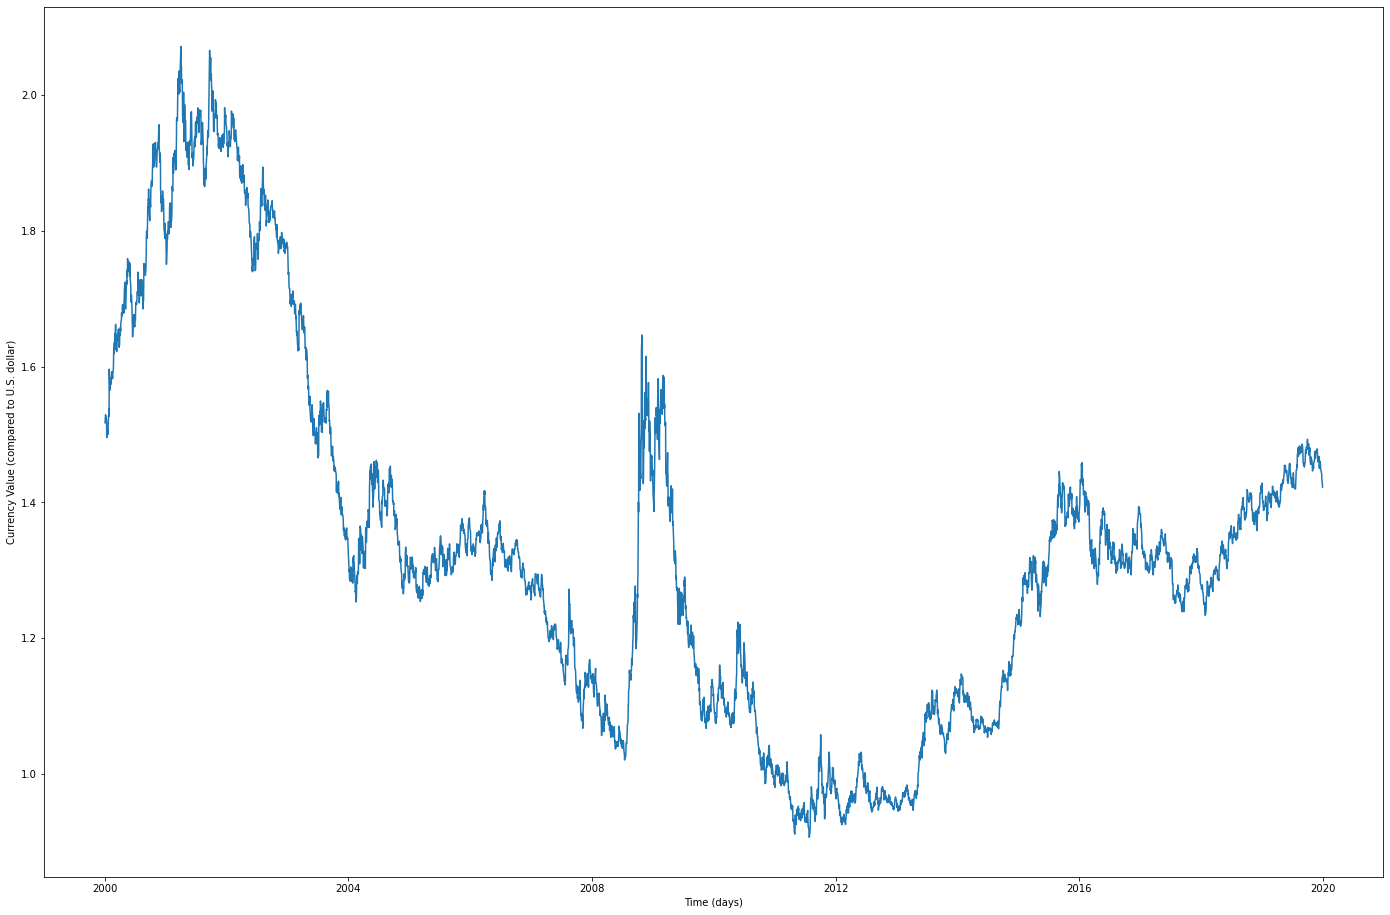

In [11]:
#Graph the currency rates.

from matplotlib.pyplot import figure
#figure()


fig = plt.figure(figsize = (24, 16))
ax = plt.axes()


ax.set_xlabel('Time (days)')
ax.set_ylabel('Currency Value (compared to U.S. dollar)')

ax.plot(np.array(df_c['Date']), np.array(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));


In [12]:
#Change the period to monthly for the currency data.

month = df_c.Date.dt.to_period("M")
df_c_ag = df_c.groupby([df_c.Date.dt.to_period("M")]).mean()
df_c_ag.reset_index(inplace = True)
df_c_ag

,Date,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01,10.0,1.523624,0.987362,1.949876,0.609686,1.805443,1.448664,8.279229,7.779055,...,1.675602,7.349286,105.314048,3.800000,8.023143,8.490762,73.138095,1.590455,30.888095,37.384524
1,2000-02,31.0,1.593231,1.016433,2.039455,0.624881,1.776714,1.451407,8.278079,7.781640,...,1.702998,7.568169,109.463333,3.800000,8.235690,8.645952,73.548571,1.633745,30.804643,37.777857
2,2000-03,53.0,1.641087,1.037013,2.040430,0.632948,1.742378,1.460774,8.278561,7.784761,...,1.715343,7.722830,106.307391,3.800000,8.409996,8.697109,73.809565,1.663617,30.719783,37.922609
3,2000-04,74.5,1.677935,1.058630,2.016400,0.631990,1.769625,1.468875,8.279285,7.787990,...,1.709590,7.887180,105.627000,3.800000,8.627190,8.748615,74.122500,1.665650,30.520250,37.992750
4,2000-05,96.0,1.729843,1.102713,2.127717,0.663261,1.828141,1.496098,8.278059,7.790793,...,1.728798,8.223165,108.254783,3.800000,9.048065,9.088730,74.886739,1.717559,30.777609,38.963043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08,5118.5,1.476127,0.898605,1.554373,0.822405,4.021968,1.327314,7.062859,7.841986,...,1.384495,6.703373,106.188636,4.186486,8.965873,9.646714,177.938636,0.978736,31.388636,30.744091
236,2019-09,5140.0,1.468190,0.908302,1.576543,0.809319,4.120905,1.324386,7.116236,7.835329,...,1.379488,6.779110,107.470952,4.183295,9.010352,9.714479,180.745238,0.990474,31.087619,30.560238
237,2019-10,5162.0,1.471274,0.904413,1.578372,0.790335,4.084285,1.318926,7.095561,7.842167,...,1.370476,6.756257,108.160217,4.187389,9.150191,9.769626,181.308261,0.993237,30.700652,30.346739
238,2019-11,5184.0,1.465107,0.905219,1.563702,0.776257,4.160310,1.323833,7.019448,7.827840,...,1.361681,6.763752,108.897143,4.155264,9.151760,9.638464,180.344048,0.993293,30.465238,30.245238


In [13]:
indi = df_l_a['indicator'].unique()
cl1 = df_l_a['classif1'].unique()
cl2 = df_l_a['classif2'].unique()
su = df_l_a['sex'].unique()
print(len(indi) * len(cl1) * len(cl2) * len(su))

31680


In the next three cells a brute force method was used to make a combination of all unique combinations of labor indicators, sex, and cohort. This was exported as a dataframe to avoid the time of making the combinations again. Subsequently we look at the linear correlation to the exchange rate of Australian currency scored using R^2. We will attempt to use linear comdinations of the values to predict the exchange rate.

In [14]:
#This makes a combination of the various inidicator, classifier, and sex combinations.
#Note that all indicators potentially have all classifiers and sex disticntions.
#Therefore there are no redundant combinations.

#results = []


#for i in indi:
#    for j in cl1:
#        for k in cl2:
#            for l in su: 
                #ivar = df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))]
                #dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
                #slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar['obs_value']),dvar)
                #results.append([i,k,j,slope, intercept, r_value, p_value, std_err])
#                results.append([i,j,k,l])
            

In [15]:
#results2 = []


#for i in indi:
#    for j in cl1:
#        for k in cl2:
#            for l in su: 
#                ivar = df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))]
#                #print(len(np.array(ivar['obs_value'])))
#                dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
#                if len(np.array(ivar['obs_value'])) == 240:
#                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar['obs_value']),dvar)
##                    results2.append([i, k, j, l, slope, intercept, r_value, p_value, std_err])
#                else:
#                    pass
                #results.append([i,j,k,l])
            

In [16]:
#df_out = pd.DataFrame(results2)
#df_out.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
#df_out.head()

In [17]:
#df_out_norm = pd.DataFrame(results2)
#df_out_norm.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
#df_out_norm.to_csv('outputs_norm.csv')
#df_out_norm.head()
#print(len(results2))

In [18]:
#df_out.to_csv('outputs.csv')

In [23]:
results3 = []
count = 0

for i in indi:
    for j in cl1:
        for k in cl2:
            for l in su:
                if (len(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2018-12'))].obs_value)) == 240) and (len(np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1999-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2018-12'))].obs_value)) == 240):
                    count += 1
                    ivar = np.divide(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2018-12'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1999-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2018-12'))].obs_value)) 
                    print(len(np.array(ivar)), count)
                    dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar),dvar)
                    results3.append([i, j, k, l, slope, intercept, r_value, p_value, std_err])
                else:
                    pass
#print(count)
time.time()

240 1
240 2
240 3
240 4
240 5
240 6
240 7
240 8
240 9
240 10
240 11
240 12
240 13
240 14
240 15
240 16
240 17
240 18
240 19
240 20
240 21
240 22
240 23
240 24
240 25
240 26
240 27
240 28
240 29
240 30
240 31
240 32
240 33
240 34
240 35
240 36
240 37
240 38
240 39
240 40
240 41
240 42
240 43
240 44
240 45
240 46
240 47
240 48
240 49
240 50
240 51
240 52
240 53
240 54
240 55
240 56
240 57
240 58
240 59
240 60
240 61
240 62
240 63
240 64
240 65
240 66
240 67
240 68
240 69
240 70
240 71
240 72
240 73
240 74
240 75
240 76
240 77
240 78
240 79
240 80
240 81
240 82
240 83
240 84
240 85
240 86
240 87
240 88
240 89
240 90
240 91
240 92
240 93
240 94
240 95
240 96
240 97
240 98
240 99
240 100
240 101
240 102
240 103
240 104
240 105
240 106
240 107
240 108
240 109
240 110
240 111
240 112
240 113
240 114
240 115
240 116
240 117
240 118
240 119
240 120
240 121
240 122
240 123
240 124
240 125
240 126
240 127
240 128
240 129
240 130
240 131
240 132
240 133
240 134
240 135
240 136
240 137
240 138
240 

/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


240 308
240 309
240 310
240 311
240 312
240 313
240 314
240 315
240 316
240 317
240 318
240 319
240 320
240 321
240 322
240 323
240 324
240 325
240 326
240 327
240 328
240 329
240 330
240 331
240 332
240 333
240 334
240 335
240 336
240 337
240 338
240 339
240 340
240 341
240 342
240 343
240 344
240 345
240 346
240 347
240 348
240 349
240 350
240 351
240 352
240 353
240 354
240 355
240 356
240 357
240 358
240 359
240 360
240 361
240 362
240 363
240 364
240 365
240 366
240 367
240 368
240 369
240 370
240 371
240 372
240 373
240 374
240 375
240 376
240 377
240 378
240 379
240 380
240 381
240 382
240 383
240 384
240 385
240 386
240 387
240 388
240 389
240 390
240 391
240 392
240 393
240 394
240 395
240 396
240 397
240 398
240 399
240 400
240 401
240 402
240 403
240 404
240 405
240 406
240 407
240 408
240 409
240 410
240 411
240 412
240 413
240 414
240 415
240 416
240 417
240 418
240 419
240 420
240 421
240 422
240 423
240 424
240 425
240 426
240 427
240 428
240 429
240 430
240 431
240 432


1612490192.1040297

In [24]:
df_out2 = pd.DataFrame(results3)
df_out2.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
df_out2.head()

,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-42.259663,4.456502,-0.411280,3.263520e-11,6.071007
1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-41.072386,4.425616,-0.393063,2.728679e-10,6.228115
2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-42.941909,4.451488,-0.424810,6.191248e-12,5.931747
3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,-36.513753,4.203323,-0.407110,5.367248e-11,5.310152
4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,-33.099195,3.962889,-0.391473,3.264305e-10,5.043173


In [25]:
df_out2.to_csv('outputs_1yr.csv')

In [26]:
results4 = []
count = 0

for i in indi:
    for j in cl1:
        for k in cl2:
            for l in su:
                if (len(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1997-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2016-12'))].obs_value)) == 240) and (len(np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1997-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2016-12'))].obs_value)) == 240):
                    count += 1
                    ivar = np.divide(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1997-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2016-12'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1997-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2016-12'))].obs_value)) 
                    print(len(np.array(ivar)), count)
                    dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar),dvar)
                    results4.append([i, j, k, l, slope, intercept, r_value, p_value, std_err])
                else:
                    pass

240 1
240 2
240 3
240 4
240 5
240 6
240 7
240 8
240 9
240 10
240 11
240 12
240 13
240 14
240 15
240 16
240 17
240 18
240 19
240 20
240 21
240 22
240 23
240 24
240 25
240 26
240 27
240 28
240 29
240 30
240 31
240 32
240 33
240 34
240 35
240 36
240 37
240 38
240 39
240 40
240 41
240 42
240 43
240 44
240 45
240 46
240 47
240 48
240 49
240 50
240 51
240 52
240 53
240 54
240 55
240 56
240 57
240 58
240 59
240 60
240 61
240 62
240 63
240 64
240 65
240 66
240 67
240 68
240 69
240 70
240 71
240 72
240 73
240 74
240 75
240 76
240 77
240 78
240 79
240 80
240 81
240 82
240 83
240 84
240 85
240 86
240 87
240 88
240 89
240 90
240 91
240 92
240 93
240 94
240 95
240 96
240 97
240 98
240 99
240 100
240 101
240 102
240 103
240 104
240 105
240 106
240 107
240 108
240 109
240 110
240 111
240 112
240 113
240 114
240 115
240 116
240 117
240 118
240 119
240 120
240 121
240 122
240 123
240 124
240 125
240 126
240 127
240 128
240 129
240 130
240 131
240 132
240 133
240 134
240 135
240 136
240 137
240 138
240 

/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


240 308
240 309
240 310
240 311
240 312
240 313
240 314
240 315
240 316
240 317
240 318
240 319
240 320
240 321
240 322
240 323
240 324
240 325
240 326
240 327
240 328
240 329
240 330
240 331
240 332
240 333
240 334
240 335
240 336
240 337
240 338
240 339
240 340
240 341
240 342
240 343
240 344
240 345
240 346
240 347
240 348
240 349
240 350
240 351
240 352
240 353
240 354
240 355
240 356
240 357
240 358
240 359
240 360
240 361
240 362
240 363
240 364
240 365
240 366
240 367
240 368
240 369
240 370
240 371
240 372
240 373
240 374
240 375
240 376
240 377
240 378
240 379
240 380
240 381
240 382
240 383
240 384
240 385
240 386
240 387
240 388
240 389
240 390
240 391
240 392
240 393
240 394
240 395
240 396
240 397
240 398
240 399
240 400
240 401
240 402
240 403
240 404
240 405
240 406
240 407
240 408
240 409
240 410
240 411
240 412
240 413
240 414
240 415
240 416
240 417
240 418
240 419
240 420
240 421
240 422
240 423
240 424
240 425
240 426
240 427
240 428
240 429
240 430
240 431
240 432


In [27]:
df_out3 = pd.DataFrame(results4)
df_out3.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
df_out_3yr = pd.read_csv('outputs_3yr.csv')
df_out_3yr.head()

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-38.013731,4.127855,-0.343836,4.591321e-08,6.729457
1,1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-35.538711,3.995592,-0.317713,4.978347e-07,6.874999
2,2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-39.838329,4.210068,-0.364621,5.855731e-09,6.594666
3,3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,-37.379876,4.256975,-0.365675,5.254073e-09,6.167130
4,4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,-36.140350,4.188752,-0.373991,2.202996e-09,5.809317


In [28]:
df_out3.to_csv('outputs_3yr.csv')

In [ ]:
#results5 = []
#count = 0

#for i in indi:
#    for j in cl1:
#        for k in cl2:
#            for l in su:
#                if (len(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1996-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2015-12'))].obs_value)) == 240) and (len(np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1996-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2015-12'))].obs_value)) == 240):
#                    count += 1
#                    ivar = np.divide(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1996-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2015-12'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1996-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2015-12'))].obs_value)) 
#                    print(len(np.array(ivar)))
#                    dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
#                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar),dvar)
#                    results5.append([i, j, k, l, slope, intercept, r_value, p_value, std_err])
#                else:
#                    pass

In [25]:
#df_out_5yr = pd.DataFrame(results5)
#df_out_5yr.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']

#df_out_5yr.head()

In [40]:
#df_out_5yr.to_csv('outputs_5yr.csv')

In [29]:
results6 = []
count = 0

for i in indi:
    for j in cl1:
        for k in cl2:
            for l in su:
                if (len(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1991-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2010-12'))].obs_value)) == 240) and (len(np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1991-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2010-12'))].obs_value)) == 240):
                    count += 1
                    ivar = np.divide(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1991-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2010-12'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1991-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2010-12'))].obs_value)) 
                    print(len(np.array(ivar)))
                    dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar),dvar)
                    results6.append([i, j, k, l, slope, intercept, r_value, p_value, std_err])
                else:
                    pass

time.time()

240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240


/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/harry/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240


<ipython-input-29-6f4a1bf38b8a>:10: RuntimeWarning: divide by zero encountered in true_divide
  ivar = np.divide(np.array(df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1991-01' <= df_l_a['time']) & ( df_l_a['time'] <= '2010-12'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == i) & (df_l_u['classif1'] == j) & (df_l_u['classif2'] == k) & (df_l_u['sex'] == l) & (('1991-01' <= df_l_u['time']) & ( df_l_u['time'] <= '2010-12'))].obs_value))
/home/harry/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240


1612497685.3613746

In [30]:
df_out_10yr = pd.DataFrame(results6)
df_out_10yr.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']

df_out_10yr.head()

,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-29.159137,3.418807,-0.125369,5.241367e-02,14.957452
1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,6.738858,0.839675,0.025601,6.931303e-01,17.056510
2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-47.007620,4.627700,-0.228279,3.635713e-04,12.995500
3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,72.042525,-4.335691,0.825846,3.807683e-61,3.188596
4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,67.156644,-4.007994,0.821715,4.758786e-60,3.019098


In [31]:
df_out_10yr.to_csv('outputs_10yr.csv')

In [ ]:
#we look at the new data frame.

#df_op = pd.read_csv('outputs.csv')
#df_op = df_op[['indicator', 'classif2', 'classif1', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']]
#df_op.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
#df_op

In [ ]:
#Drop any duplicates.
#df_op.drop_duplicates(inplace = True)
#df_op

We skip the step of making the data sets and simply load the outputs to save time when working with the data.

In [26]:
df_out_1m = pd.read_csv('outputs.csv')
df_out_1m.head()

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,0,POP_XWAP_SEX_AGE_NB,0,AGE_10YRBANDS_TOTAL,SEX_T,-0.000077,2.681734,-0.488918,7.950006e-16,0.000009
1,1,POP_XWAP_SEX_AGE_NB,0,AGE_10YRBANDS_TOTAL,SEX_M,-0.000159,2.711800,-0.500767,1.223767e-16,0.000018
2,2,POP_XWAP_SEX_AGE_NB,0,AGE_10YRBANDS_TOTAL,SEX_F,-0.000147,2.651662,-0.477276,4.664887e-15,0.000018
3,3,POP_XWAP_SEX_AGE_NB,0,AGE_10YRBANDS_Y15-24,SEX_T,-0.000801,3.699137,-0.626532,1.418705e-27,0.000065
4,4,POP_XWAP_SEX_AGE_NB,0,AGE_10YRBANDS_Y15-24,SEX_M,-0.001516,3.614143,-0.627166,1.212720e-27,0.000122


In [29]:
df_out_1yr = pd.read_csv('outputs_1yr.csv')
df_out_1yr.drop_duplicates(inplace = True)
df_out_1yr.head()

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-43.289884,4.584038,-0.429644,3.356784e-12,5.897611
1,1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,NaN,NaN,NaN,NaN,NaN
2,2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-42.973076,4.620775,-0.414724,2.152724e-11,6.111745
3,3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,NaN,NaN,NaN,NaN,NaN
4,4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-43.265739,4.525403,-0.440394,8.306241e-13,5.717366


In [28]:
df_out_3yr = pd.read_csv('outputs_3yr.csv')
df_out_3yr.head()

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-38.013731,4.127855,-0.343836,4.591321e-08,6.729457
1,1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-35.538711,3.995592,-0.317713,4.978347e-07,6.874999
2,2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-39.838329,4.210068,-0.364621,5.855731e-09,6.594666
3,3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,-37.379876,4.256975,-0.365675,5.254073e-09,6.167130
4,4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,-36.140350,4.188752,-0.373991,2.202996e-09,5.809317


In [33]:
#Take the top values.
top_r = df_out_1m.nlargest(20, 'r_value')
top_r

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
637,637,EIP_DWAP_SEX_AGE_RT,0,AGE_10YRBANDS_Y55-64,SEX_M,0.044101,-0.053888,0.708836,6.089441e-38,0.002845
652,652,EIP_DWAP_SEX_AGE_RT,0,AGE_AGGREGATE_Y55-64,SEX_M,0.044101,-0.053888,0.708836,6.089441e-38,0.002845
635,635,EIP_DWAP_SEX_AGE_RT,0,AGE_10YRBANDS_Y45-54,SEX_F,0.062062,-0.124800,0.672328,6.251428e-33,0.004429
633,633,EIP_DWAP_SEX_AGE_RT,0,AGE_10YRBANDS_Y45-54,SEX_T,0.109129,-0.605606,0.669650,1.366021e-32,0.007845
636,636,EIP_DWAP_SEX_AGE_RT,0,AGE_10YRBANDS_Y55-64,SEX_T,0.029381,0.142884,0.667283,2.708564e-32,0.002126
651,651,EIP_DWAP_SEX_AGE_RT,0,AGE_AGGREGATE_Y55-64,SEX_T,0.029381,0.142884,0.667283,2.708564e-32,0.002126
666,666,EIP_DWAP_SEX_AGE_RT,0,AGE_YTHADULT_YGE25,SEX_T,0.137426,-3.636337,0.660495,1.861781e-31,0.010126
463,463,UNE_TUNE_SEX_AGE_DUR_NB,DUR_DETAILS_MGE24,AGE_YTHADULT_YGE15,SEX_M,0.013124,0.784670,0.647175,7.099783e-30,0.001002
638,638,EIP_DWAP_SEX_AGE_RT,0,AGE_10YRBANDS_Y55-64,SEX_F,0.021096,0.288452,0.639455,5.398456e-29,0.001644
653,653,EIP_DWAP_SEX_AGE_RT,0,AGE_AGGREGATE_Y55-64,SEX_F,0.021096,0.288452,0.639455,5.398456e-29,0.001644


In [34]:
top_r['indicator'].unique()

array(['EIP_DWAP_SEX_AGE_RT', 'UNE_TUNE_SEX_AGE_DUR_NB',
       'UNE_DEAP_SEX_AGE_RT', 'EMP_TEMP_SEX_STE_DT',
       'UNE_DEA1_SEX_AGE_RT'], dtype=object)

In [35]:
top_r2 = df_out_1yr.nlargest(20, 'r_value')
top_r2

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
22361,22361,UNE_TUNE_SEX_AGE_DUR_NB,AGE_YTHADULT_YGE15,DUR_AGGREGATE_MGE12,SEX_T,2.091201,1.033587,0.908780,2.601382e-92,0.062240
26171,26171,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_M,0.624620,0.748916,0.903578,1.389565e-89,0.019197
26169,26169,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_T,0.726798,0.633960,0.899986,8.651435e-88,0.022819
24381,24381,UNE_DEAP_SEX_AGE_RT,AGE_10YRBANDS_Y25-34,0,SEX_T,0.738487,0.647082,0.896864,2.768874e-86,0.023608
22363,22363,UNE_TUNE_SEX_AGE_DUR_NB,AGE_YTHADULT_YGE15,DUR_AGGREGATE_MGE12,SEX_M,1.767431,1.065105,0.896365,4.766124e-86,0.056661
22365,22365,UNE_TUNE_SEX_AGE_DUR_NB,AGE_YTHADULT_YGE15,DUR_AGGREGATE_MGE12,SEX_F,2.475792,1.001533,0.895625,1.061953e-85,0.079703
26357,26357,UNE_DEA1_SEX_AGE_RT,AGE_YTHADULT_YGE15,0,SEX_M,0.698649,0.642597,0.893558,9.641100e-85,0.022753
26045,26045,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_TOTAL,0,SEX_M,0.698649,0.642597,0.893558,9.641985e-85,0.022753
25200,25200,UNE_DEAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_T,0.712599,0.651101,0.892383,3.311678e-84,0.023359
24383,24383,UNE_DEAP_SEX_AGE_RT,AGE_10YRBANDS_Y25-34,0,SEX_M,0.578916,0.791885,0.891259,1.064167e-83,0.019094


In [37]:
top_r3 = df_out_3yr.nlargest(20, 'r_value')
top_r3

,Unnamed: 0,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
550,550,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_M,0.541134,0.794905,0.914832,1.066716e-95,0.015484
493,493,UNE_TUN1_SEX_AGE_NB,AGE_YTHADULT_YGE25,0,SEX_M,7.963845,0.762815,0.914470,1.728178e-95,0.228428
475,475,UNE_TUN1_SEX_AGE_NB,AGE_AGGREGATE_Y25-54,0,SEX_M,7.908655,0.759957,0.913925,3.560176e-95,0.227670
549,549,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_T,0.641868,0.687511,0.911182,1.257739e-93,0.018813
559,559,UNE_DEA1_SEX_AGE_RT,AGE_YTHADULT_Y15-64,0,SEX_M,0.620922,0.688995,0.905633,1.214342e-90,0.018846
544,544,UNE_DEA1_SEX_AGE_RT,AGE_AGGREGATE_TOTAL,0,SEX_M,0.623729,0.690163,0.904685,3.762562e-90,0.019042
556,556,UNE_DEA1_SEX_AGE_RT,AGE_YTHADULT_YGE15,0,SEX_M,0.623729,0.690163,0.904685,3.762807e-90,0.019042
522,522,UNE_DEAP_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_T,0.632073,0.696795,0.903854,1.004073e-89,0.019394
523,523,UNE_DEAP_SEX_AGE_RT,AGE_AGGREGATE_Y25-54,0,SEX_M,0.522403,0.810426,0.902272,6.352442e-89,0.016182
540,540,UNE_DEAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_T,0.618628,0.711865,0.902219,6.756933e-89,0.019168


In [ ]:
#Plot the most correlated value against the monthly average exchange rate.

fig = plt.figure(figsize = (24, 16))
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Aus Dollar Value')
ax1.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']), label = 'aus dollar')
#ax1.tick_params(axis='y')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Economic Inactivity Male Ages 55-64')  # we already handled the x-label with ax1
ax2.plot(df_c_ag.index, np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_T') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value)), color = color, label = 'employment')
ax2.tick_params(axis='y')

leg1 = ax1.legend(['Aus Dollar'], prop = {'size':12})
leg2 = ax2.legend(['Economic Inactivity Male Ages 55-64'], loc = 'lower left', prop = {'size':12})
#ax1.add_artist(leg1)
#ax2.add_artist(leg2)bbox_to_anchor=(0.5, 0., 0.5, 0.5)
#leg1.get_lines()[0].set_lw(1)
#leg2.get_lines()[0].set_lw(1)
#ax.plot(np.array(df_c_ag['Date']), np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));
ax1.add_artist(leg1)

#ax.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));


In [ ]:
df_out_norm = pd.read_csv('/home/harry/Labor_currency_project/Preliminary_exploration/outputs_norm.csv')
df_out_norm = df_out_norm.drop(columns = ['Unnamed: 0'])
df_out_norm.to_csv('outputs_norm.csv')
df_out_norm.head()

Next we will create two data sets. One of these will use the raw labor data from Australia and the other will take the normalized data. In both cases the data will be divided into four data points for each value for each month. These will be the independent parameters in the models which will be trained using the each set.

In [ ]:
fac1 = df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_T') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac2 = df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac3 = df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac4 = df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value




LAU = [list(fac1),list(fac2),list(fac3),list(fac4)]

AUS = zip(list(fac1),list(fac2),list(fac3),list(fac4))
zAUS = list(AUS)
zfAUS = zAUS[:]




AUSf1  = np.array(list(fac1)).reshape(-1, 1)

AUSf2 = np.array(list(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_AGGREGATE_TOTAL') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value)).reshape(-1,1)

AUSf3 = np.array(np.divide(np.array(list(fac1)), np.array(list(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_T') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value)))).reshape(-1,1)



In [ ]:
#Here we normalize the vectors for the Australian labor by comparing it to the United States numbers in an element-wise division.

fac1n = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_T') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
fac2n = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_u['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
fac3n = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
fac4n = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_u['sex'] == 'SEX_F') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))

AUSn = zip(list(fac1n),list(fac2n),list(fac3n),list(fac4n))

zAUSn = list(AUSn)

zfAUSn = zAUSn[:]



In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression(fit_intercept = True)
clf.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1 = clf.predict(zfAUS[201:])
print(len(np.array(pred1)), len(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]), pred1.reshape(1,-1).shape)
#print(clf.score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']).reshape(-1, 1)[201:],pred1.reshape(1,-1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1))

In [ ]:
clfn = LinearRegression(fit_intercept = True)
clfn.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1n = clfn.predict(zfAUSn[201:])
print(len(np.array(pred1n)), len(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]), pred1n.reshape(1,-1).shape)
#print(clf.score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']).reshape(-1, 1)[202:],pred1.reshape(1,-1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1n))

We will next attempt to use three types of linear regression to solve the same problem. The types are Ridge, Lasso, and Elastic Net. Each penalizes outliers and errors (which are present in the current data sets) in a different fashion. Below we will use gridsearch to attempt to find the best fitting parameters.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

#Non normalized data/
clf1 = Ridge()
pars = {'alpha': [.001, .005, .01, .1, 1, 2, 5, 10, 15, 20]}
CV_clf1 = GridSearchCV(estimator=clf1, param_grid = pars, scoring = 'r2')
CV_clf1.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf1.best_params_

In [ ]:
#Normalized data.
clf1 = Ridge()
pars = {'alpha': [.001, .005, .01, .1, .2, 1, 2, 5, 10, 15, 20]}
CV_clf1 = GridSearchCV(estimator=clf1, param_grid = pars, scoring = 'r2')
CV_clf1.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf1.best_params_

In [ ]:
#Non normalized data.
clf2 = Lasso()
pars = {'alpha': [.001, .005, .01, .1, 1, 2, 5, 10, 15, 20]}
CV_clf2 = GridSearchCV(estimator=clf2, param_grid = pars, scoring = 'r2')
CV_clf2.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf2.best_params_

In [ ]:
#Normalized Data
clf2 = Lasso()
pars = {'alpha': [.001, .005, .01, .1, 1, 2, 5, 10, 15, 20]}
CV_clf2 = GridSearchCV(estimator=clf2, param_grid = pars, scoring = 'r2')
CV_clf2.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf2.best_params_
#CV_clf2.estimator.get_params().keys()

In [ ]:
#Non normalized data.
clf3 = ElasticNet()
pars = {'alpha': [.001, .005, .01, .1, 1, 2, 5, 10, 15, 20], 'l1_ratio' : [.01, .1, .25, .5, .75, .9]}
CV_clf3 = GridSearchCV(estimator=clf3, param_grid = pars, scoring = 'r2')
CV_clf3.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf3.best_params_

In [ ]:
#Normalized data.
clf3 = ElasticNet()
pars = {'alpha': [.001, .005, .01, .1, 1, 2, 5, 10, 15, 20], 'l1_ratio' : [.01, .1, .25, .5, .75, .9]}
CV_clf3 = GridSearchCV(estimator=clf3, param_grid = pars, scoring = 'r2')
CV_clf3.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf3.best_params_

We now run the regressions

In [ ]:
#Non normalized data.
clf1 = Ridge(alpha = 20, fit_intercept = True)
clf1.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1 = clf1.predict(zfAUS[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))


In [ ]:
#Normalized data.
clf1 = Ridge(alpha = .2, fit_intercept = True)
clf1.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1 = clf1.predict(zfAUSn[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred1)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))


In [ ]:
#Non normalized data.
clf2 = Lasso(alpha = .01, fit_intercept = True)
clf2.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred2 = clf2.predict(zfAUS[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred2), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred2), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred2)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

In [ ]:
#Normalized data.
clf3 = Lasso(alpha = .001, fit_intercept = True)
clf3.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred3 = clf3.predict(zfAUSn[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred3), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred3), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred3)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

In [ ]:
#Non normalized data.
clf4 = ElasticNet(alpha = 1, l1_ratio = .01, fit_intercept = True)
clf4.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred4 = clf4.predict(zfAUS[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

In [ ]:
#Normalized data.
clf4 = ElasticNet(alpha = .001, l1_ratio = .01, fit_intercept = True)
clf4.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred4 = clf4.predict(zfAUSn[201:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:], pred4)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[201:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

Now we will test for  range of dates, not for some of these factors data in the U.S. only goes back to 1994. So regressions will have a maximum of six years shift. This will only be done with the normalized data as that provided more accurate regressions.

In [ ]:
dates1 = [['1999-12', '2019-11'],['1998-01', '2017-12'], ['1995-01', '2014-12'], ['1994-01', '2013-12']]

In [ ]:
results_rg =[]
alpha =[.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))

for i in dates1:
    fac1v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac2v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_u['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac3v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
    fac4v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_u['sex'] == 'SEX_F') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
  
    
    AUSv = zip(list(fac1v),list(fac2v),list(fac3v),list(fac4v))
    #AUS = zip(list(fac1),list(fac2))
    zAUSv = list(AUSv)
    zfAUSv = zAUSv[:]
    
    for k in np.arange(2,20,1):
        clfv = Ridge()
        pars = {'alpha': [.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))}
        CV_clfv = GridSearchCV(estimator=clfv, param_grid = pars, scoring = 'r2', cv= k)
        CV_clfv.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        CV_clfv.best_params_
    
        #print(k, CV_clfv.best_params_['alpha'], CV_clfv.best_params_['l1_ratio'])
    
        clfv = Ridge(alpha = CV_clfv.best_params_['alpha'], fit_intercept = True)
        #clfv = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
        clfv.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        pred1v = clfv.predict(zfAUSv[216:])
        #print(clfv.coef_)
        #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
        #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
        #print(clf2.score(X_test_4, np.asarray(y_test_4)))
        results_rg.append([i,k,CV_clfv.best_params_['alpha'],clfv.coef_[0], clfv.coef_[1], clfv.coef_[2], clfv.coef_[3],sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


In [ ]:
df_r_rd = pd.DataFrame(results_rg)
df_r_rd.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'Coef 3', 'Coef 4', 'r2_score', 'mean sqr error', 'mean sqr error norm']
df_r_rd


In [ ]:
df_r_rd.nlargest(10, 'r2_score')

In [ ]:
df_r_rd.nsmallest(10, 'mean sqr error')

In [ ]:
clf1 = Ridge(alpha = 1.5, fit_intercept = True)
clf1.fit(zfAUSn[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
pred1 = clf1.predict(zfAUSn[216:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred1)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

In [ ]:
results_ls =[]


for i in dates1:
    fac1v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac2v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_u['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac3v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
    fac4v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_u['sex'] == 'SEX_F') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
  
    
    AUSv = zip(list(fac1v),list(fac2v),list(fac3v),list(fac4v))
    #AUS = zip(list(fac1),list(fac2))
    zAUSv = list(AUSv)
    zfAUSv = zAUSv[:]
    
    for k in np.arange(2,20,1):
        clf1v = Lasso()
        pars = {'alpha': [.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5))}
        CV_clf1v = GridSearchCV(estimator=clf1v, param_grid = pars, scoring = 'r2', cv= k)
        CV_clf1v.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        CV_clf1v.best_params_
    
        #print(k, CV_clf1v.best_params_['alpha'])
    
        clf1v = Lasso(alpha = CV_clf1v.best_params_['alpha'], fit_intercept = True)
        #clf1v = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
        clf1v.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        pred2v = clf1v.predict(zfAUSv[216:])
        #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
        #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
        #print(clf2.score(X_test_4, np.asarray(y_test_4)))
        results_ls.append([i, k, CV_clf1v.best_params_['alpha'], clf1v.coef_[0], clf1v.coef_[1], clf1v.coef_[2], clf1v.coef_[3], sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


In [ ]:
df_r_ls = pd.DataFrame(results_ls)
df_r_ls.columns = ['date', 'kfolds', 'alpha', 'Coef 1', 'Coef 2', 'Coef 3', 'Coef 4', 'r2_score', 'mean sqr err', 'mean sqr err norm']
df_r_ls


In [ ]:
df_r_ls.nlargest(10,'r2_score')

In [ ]:
df_r_ls.nsmallest(10,'mean sqr err')

In [ ]:
clf2 = Lasso(alpha = .01, fit_intercept = True)
clf2.fit(zfAUSn[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
pred2 = clf2.predict(zfAUSn[216:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred2)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))

In [ ]:
results_en =[]


for i in dates1:
    fac1v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac2v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_u['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
    fac3v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
    fac4v = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_u['sex'] == 'SEX_F') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
  
    
    AUSv = zip(list(fac1v),list(fac2v),list(fac3v),list(fac4v))
    #AUSv = zip(list(fac1v),list(fac2v),list(fac3v))
    #AUS = zip(list(fac1),list(fac2))
    zAUSv = list(AUSv)
    zfAUSv = zAUSv[:]
    
    for k in np.arange(2,20,1):
        clf2v = ElasticNet()
        pars = {'alpha': [.001, .005, .01, .05, .1, .25,] + list(np.arange(.5,10,.5)), 'l1_ratio' : [.01, .05, .1, .15, .2, .25, .5, .75, .9]}
        CV_clf2v = GridSearchCV(estimator=clf2v, param_grid = pars, scoring = 'r2', cv= k)
        CV_clf2v.fit(zfAUSv[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        CV_clf2v.best_params_
    
        #print(k, CV_clf2v.best_params_['alpha'], CV_clf2v.best_params_['l1_ratio'])
    
        clf2v = ElasticNet(alpha = CV_clf2v.best_params_['alpha'], l1_ratio = CV_clf2v.best_params_['l1_ratio'], fit_intercept = True)
        #clf2v = ElasticNet(alpha = 0.1, l1_ratio = .01, fit_intercept = True)
        clf2v.fit(zfAUSv[:216], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
        pred3v = clf2v.predict(zfAUSv[216:])
        print(clf2v.coef_)
        #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
        #print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
        #print(clf2.score(X_test_4, np.asarray(y_test_4)))
        results_en.append([i,k,CV_clf2v.best_params_['alpha'],CV_clf2v.best_params_['l1_ratio'],clf2v.coef_[0], clf2v.coef_[1], clf2v.coef_[2], clf2v.coef_[3],sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v), sk.metrics.mean_squared_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred3v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:])]) 


In [ ]:
df_r_en = pd.DataFrame(results_en)
df_r_en.columns = ['date', 'kfolds', 'alpha', 'l1_ratio', 'Coef 1', 'Coef 2', 'Coef 3', 'Coef 4', 'r2_score', 'mean sqr err', 'mean sqr err norm']
df_r_en


In [ ]:
df_r_en.nlargest(10, 'r2_score')

In [ ]:
df_r_en.nsmallest(10, 'mean sqr err')

In [ ]:
i = ['1994-01', '2013-12']

fac1x = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
fac2x = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_u['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_u['sex'] == 'SEX_M') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
fac3x = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_u['sex'] == 'SEX_M') & (('1999-12' <= df_l_u['time']) & ( df_l_u['time'] <= '2019-11'))].obs_value))
fac4x = np.divide(np.array(df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value), np.array(df_l_u[(df_l_u['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_u['classif2'] == 0) & (df_l_u['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_u['sex'] == 'SEX_F') & ((i[0] <= df_l_u['time']) & ( df_l_u['time'] <= i[1]))].obs_value))
  
    
AUSx = zip(list(fac1x),list(fac2x),list(fac3x),list(fac4x))
#AUS = zip(list(fac1),list(fac2))
zAUSx = list(AUSx)
zfAUSx = zAUSx[:]

In [ ]:
clf4 = ElasticNet(alpha = .05, l1_ratio = .25, fit_intercept = True)
clf4.fit(zfAUSx[:216], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:216])
pred4 = clf4.predict(zfAUSx[216:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred4), sk.metrics.mean_squared_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred4), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:], pred4)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[216:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))